# Worksheet 18

Name: Ryan Chung  
UID: U33101958 

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

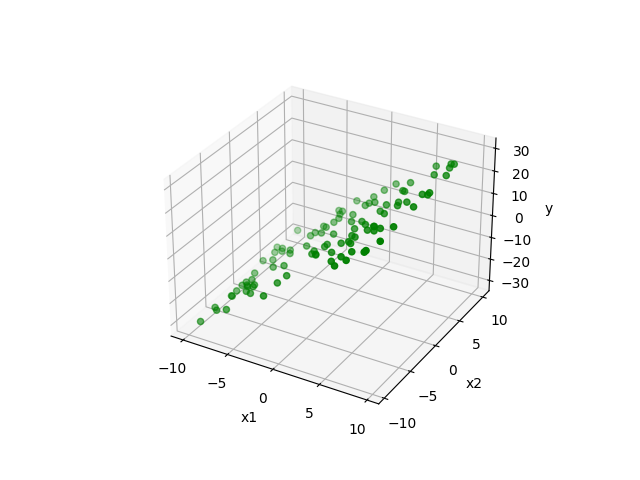

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

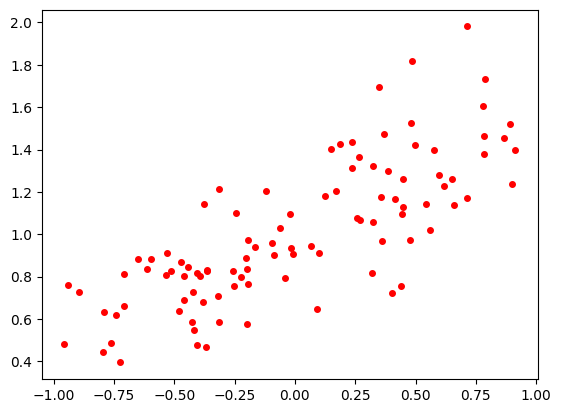

In [25]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

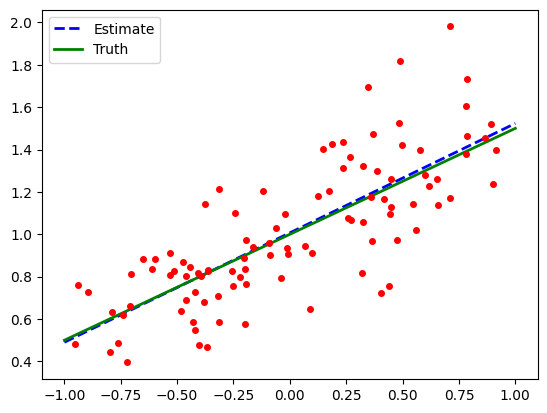

In [26]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated regression line is close to the true regression line, indicating that the least squares estimation did a good job of identifying the underlying relationship between X and Y. This close match suggests that the estimation captured the central tendency of the data well. If the variance of the estimate was lower, we would expect even tighter clustering of the data points around the estimated line.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

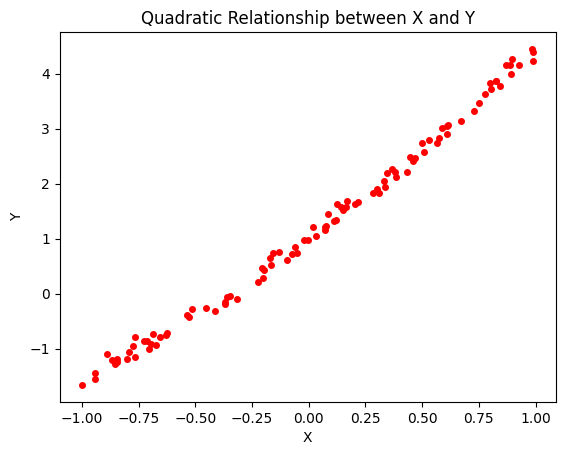

In [28]:
SAMPLE_SIZE = 100

true_coeffs = np.array([1, 3, 0.5])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_coeffs[0] + true_coeffs[1] * x + true_coeffs[2] * x**2 + np.random.randn(SAMPLE_SIZE) * 0.1
plt.plot(x, y, 'ro', markersize=4)
plt.title('Quadratic Relationship between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

e) Plot the least squares estimate line through the scatter plot.

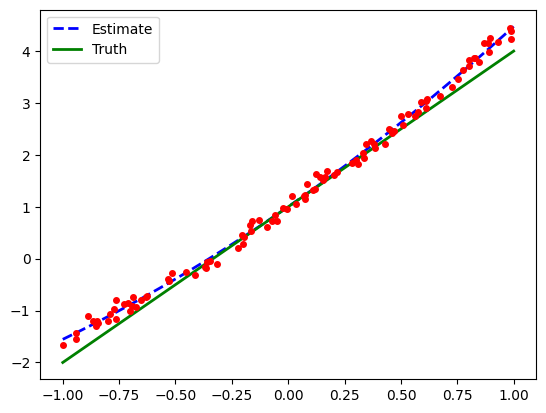

In [29]:
intercept = np.ones(np.shape(x)[0])
X = np.vstack([np.ones(SAMPLE_SIZE), x, x**2]).T
beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

x_plot = np.linspace(-1,1,500)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_coeffs[0] + true_coeffs[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.savefig("graph.png")
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated regression line is close to the true regression line, indicating that the least squares estimation did a good job of identifying the underlying relationship between X and Y. This close match suggests that the estimation captured the central tendency of the data well. If the variance of the estimate was lower, we would expect even tighter clustering of the data points around the estimated line. However, the true regression line appears to be more linear.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

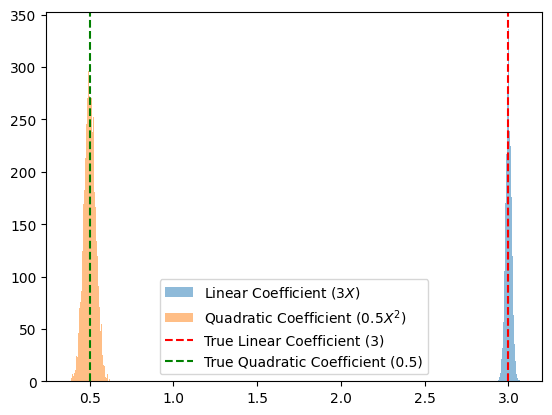

In [18]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([1, 3, 0.5])

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE) * 0.1
    intercept = np.ones(np.shape(x)[0])
    X = np.vstack([intercept, x, x**2]).T
    beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]
    betas.append(beta_hat)

# Plot
plt.hist(np.array(betas)[:, 1], bins=100, alpha=0.5, label='Linear Coefficient ($3X$)')
plt.hist(np.array(betas)[:, 2], bins=100, alpha=0.5, label='Quadratic Coefficient ($0.5X^2$)')
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Linear Coefficient (3)')
plt.axvline(x=true_beta[2], c='g', linestyle='dashed', label='True Quadratic Coefficient (0.5)')
plt.legend()
plt.show()